In [1]:
import numpy as np
import os
import pickle

# Subject 2

In [2]:
with open('../data/raw_text.pkl', 'rb') as file:
    data = pickle.load(file)

/var/tmp/ipykernel_39162/2314579544.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


In [3]:
import random
random.seed(42)
keys = list(data.keys())
random.shuffle(keys)
train_keys = keys[:80]
test_keys = keys[80:]

In [ ]:
train_X_path_2 = "../data/bow/train"
train_Y_path_2 = "/ocean/projects/mth240012p/shared/data/subject2"

train_X_list_2 = []
train_Y_list_2 = []
for story in train_keys:
    x_file = os.path.join(train_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_2, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['arr_0'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)):
            print(f"⚠️ NaN values found in {story}. Skipping {story}.")
            continue
    
        train_X_list_2.append(X)
        train_Y_list_2.append(Y)
    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

# Row combine (stack) all the data
train_X_combined_2 = np.vstack(train_X_list_2)
train_Y_combined_2 = np.vstack(train_Y_list_2)

In [5]:
test_X_path_2 = "../data/bow/test"
test_Y_path_2 = "/ocean/projects/mth240012p/shared/data/subject2"

test_X_list_2 = []
test_Y_list_2 = []
for story in test_keys:
    x_file = os.path.join(test_X_path_2, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_2, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['arr_0'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)):
            print(f"⚠️ NaN values found in {story}. Skipping {story}.")
            continue
    
        test_X_list_2.append(X)
        test_Y_list_2.append(Y)
    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

# Row combine (stack) all the data
test_X_combined_2 = np.vstack(test_X_list_2)
test_Y_combined_2 = np.vstack(test_Y_list_2)

⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue1.npy. Skipping dialogue1.
⚠️ NaN values found in canplanetearthfeedtenbillionpeoplepart3. Skipping canplanetearthfeedtenbillionpeoplepart3.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/dialogue4.npy. Skipping dialogue4.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject2/myfirstdaywiththeyankees.npy. Skipping myfirstdaywiththeyankees.


In [8]:
from sklearn.linear_model import Ridge
from ridge_utils.ridge import ridge_corr, zs

alphas = [0.5]
Rcorrs = ridge_corr(train_X_combined_2, test_X_combined_2, train_Y_combined_2, test_Y_combined_2, alphas)
mean_ccs = [np.mean(c) for c in Rcorrs]
idx_2 = int(np.argmax(mean_ccs))
alpha_2 = alphas[best_idx_2]
ccs_2 = Rcorrs[best_idx_2]
print(f"alpha: {alpha_2:.2f}")
print(f"Mean CC:    {np.mean(ccs_2):.4f}")

Best alpha: 0.50
Mean CC:    0.0019


In [9]:
with open('ccs_2.pkl', 'wb') as f:
    pickle.dump(ccs_2, f)

In [10]:
random.seed(42)
n_columns = train_Y_combined_2.shape[1]  # Get the number of columns
random_indices = np.random.choice(n_columns, size=500, replace=False)
train_Y_random_columns_2 = train_Y_combined_2[:, random_indices]
test_Y_random_columns_2 = test_Y_combined_2[:, random_indices]

In [11]:
from ridge_utils.ridge import bootstrap_ridge
alphas = np.logspace(0, 2, 10)
wt_2, corrs_2, valphas_2, allRcorrs_2, valinds_2 = bootstrap_ridge(
    train_X_combined_2, train_Y_random_columns_2, test_X_combined_2, test_Y_random_columns_2, alphas, 15, 10, 500)

print(f"Mean CC:    {np.mean(corrs_2):.4f}")
print(f"Median CC:  {np.median(corrs_2):.4f}")
print(f"Top 1% CC:  {np.percentile(corrs_2, 99):.4f}")
print(f"Top 5% CC:  {np.percentile(corrs_2, 95):.4f}")

Mean CC:    0.0032
Median CC:  0.0032
Top 1% CC:  0.0348
Top 5% CC:  0.0224


In [12]:
with open('best_ccs_2.pkl', 'wb') as f:
    pickle.dump(corrs_2, f)

# Subject 3

In [4]:
train_X_path_3 = "../data/bow/train"
train_Y_path_3 = "/ocean/projects/mth240012p/shared/data/subject3"

train_X_list_3 = []
train_Y_list_3 = []
for story in train_keys:
    x_file = os.path.join(train_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(train_Y_path_3, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['arr_0'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)):
            print(f"⚠️ NaN values found in {story}. Skipping {story}.")
            continue
    
        train_X_list_3.append(X)
        train_Y_list_3.append(Y)
    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

# Row combine (stack) all the data
train_X_combined_3 = np.vstack(train_X_list_3)
train_Y_combined_3 = np.vstack(train_Y_list_3)

⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue6.npy. Skipping dialogue6.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue2.npy. Skipping dialogue2.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue5.npy. Skipping dialogue5.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue3.npy. Skipping dialogue3.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/onlyonewaytofindout.npy. Skipping onlyonewaytofindout.


In [5]:
test_X_path_3 = "../data/bow/test"
test_Y_path_3 = "/ocean/projects/mth240012p/shared/data/subject3"

test_X_list_3 = []
test_Y_list_3 = []
for story in test_keys:
    x_file = os.path.join(test_X_path_3, f"delayed_{story}.npz")
    y_file = os.path.join(test_Y_path_3, f"{story}.npy")

    if not os.path.exists(y_file):
        print(f"⚠️ Missing Y file: {y_file}. Skipping {story}.")
        continue

    try:
        X = np.load(x_file)['arr_0'].astype(np.float32)
        Y = np.load(y_file).astype(np.float32)

        if np.any(np.isnan(Y)):
            print(f"⚠️ NaN values found in {story}. Skipping {story}.")
            continue
    
        test_X_list_3.append(X)
        test_Y_list_3.append(Y)
    except Exception as e:
        print(f"❌ Error loading {story}: {e}")
        continue

# Row combine (stack) all the data
test_X_combined_3 = np.vstack(test_X_list_3)
test_Y_combined_3 = np.vstack(test_Y_list_3)

⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue1.npy. Skipping dialogue1.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/dialogue4.npy. Skipping dialogue4.
⚠️ Missing Y file: /ocean/projects/mth240012p/shared/data/subject3/myfirstdaywiththeyankees.npy. Skipping myfirstdaywiththeyankees.


In [8]:
from sklearn.linear_model import Ridge
from ridge_utils.ridge import ridge_corr, zs

alphas = [0.5]
Rcorrs = ridge_corr(train_X_combined_3, test_X_combined_3, train_Y_combined_3, test_Y_combined_3, alphas)
mean_ccs = [np.mean(c) for c in Rcorrs]
idx_3 = int(np.argmax(mean_ccs))
alpha_3 = alphas[idx_3]
ccs_3 = Rcorrs[idx_3]
print(f"alpha: {alpha_3:.2f}")
print(f"Mean CC:    {np.mean(ccs_3):.4f}")

alpha: 0.50
Mean CC:    0.0012


In [9]:
with open('ccs_3.pkl', 'wb') as f:
    pickle.dump(ccs_3, f)

In [ ]:
with open('ccs_2.pkl', 'rb') as f:
    ccs_2 = pickle.load(f)
with open('ccs_3.pkl', 'rb') as f:
    ccs_3 = pickle.load(f)

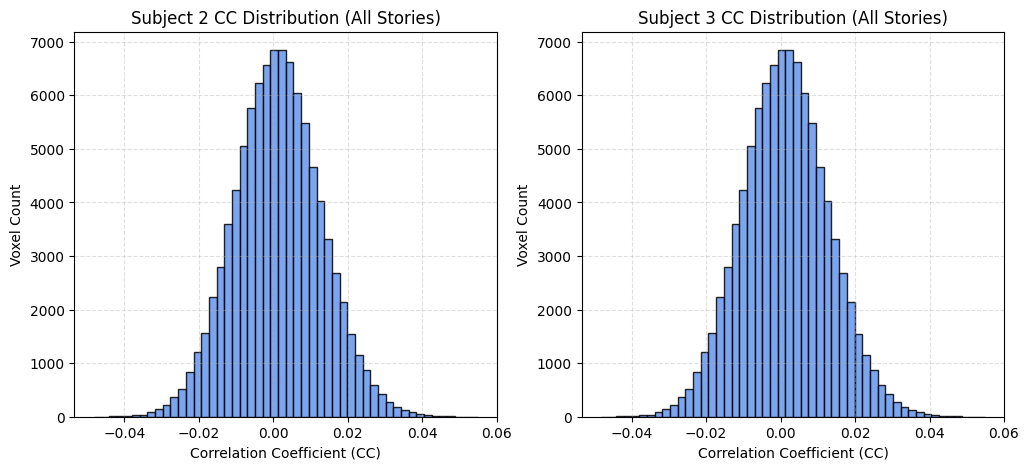

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ccs_2, bins=50, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 2 CC Distribution (All Stories)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
plt.hist(ccs_3, bins=50, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 3 CC Distribution (All Stories)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

In [6]:
random.seed(42)
n_columns = train_Y_combined_3.shape[1]  # Get the number of columns
random_indices = np.random.choice(n_columns, size=500, replace=False)
train_Y_random_columns_3 = train_Y_combined_3[:, random_indices]
test_Y_random_columns_3 = test_Y_combined_3[:, random_indices]

In [7]:
from ridge_utils.ridge import bootstrap_ridge
alphas = np.logspace(0, 2, 10)
wt_3, corrs_3, valphas_3, allRcorrs_3, valinds_3 = bootstrap_ridge(
    train_X_combined_3, train_Y_random_columns_3, test_X_combined_3, test_Y_random_columns_3, alphas, 15, 10, 500)
print(f"Mean CC:    {np.mean(corrs_3):.4f}")
print(f"Median CC:  {np.median(corrs_3):.4f}")
print(f"Top 1% CC:  {np.percentile(corrs_3, 99):.4f}")
print(f"Top 5% CC:  {np.percentile(corrs_3, 95):.4f}")

Mean CC:    0.0045
Median CC:  0.0036
Top 1% CC:  0.0436
Top 5% CC:  0.0292


In [8]:
with open('best_ccs_3.pkl', 'wb') as f:
    pickle.dump(corrs_3, f)

In [9]:
with open('best_ccs_2.pkl', 'rb') as f:
    best_ccs_2 = pickle.load(f)
with open('best_ccs_3.pkl', 'rb') as f:
    best_ccs_3 = pickle.load(f)

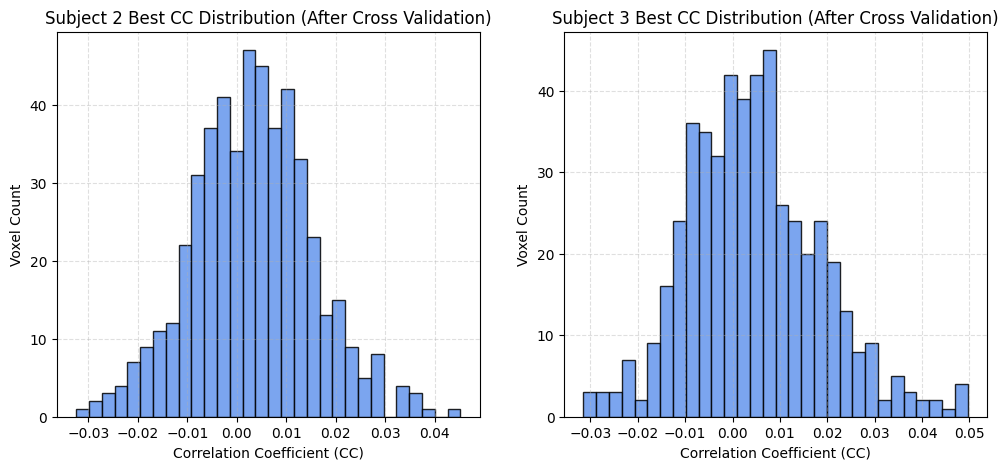

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(best_ccs_2, bins=30, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 2 Best CC Distribution (After Cross Validation)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
plt.hist(best_ccs_3, bins=30, color='cornflowerblue', edgecolor='black', alpha=0.85)
plt.title(f"Subject 3 Best CC Distribution (After Cross Validation)")
plt.xlabel("Correlation Coefficient (CC)")
plt.ylabel("Voxel Count")
plt.grid(True, linestyle='--', alpha=0.4)